In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
import xgboost as xgb
from tensorflow.keras.optimizers import Adam
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import EarlyStopping
import time
import os
from typing import Dict, List, Tuple
from tensorflow.keras import layers, models
from typing import List, Dict, Tuple, Optional
from pathlib import Path



In [2]:
df = pd.read_csv("/Users/sohinikar/FL/M.Tech_Dissertation/Obfuscated-MalMem2022_train_and_test.csv")
df.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
1,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
2,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign
4,Benign,40,12,13.800000,0,306.950000,2082,52.050000,12278,306.950000,...,222,26,27,118,0,123,88,0,8,Benign


In [3]:
df.shape

(52708, 57)

In [4]:
df.describe()

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
count,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,5.270800e+04,52708.000000,52708.0,...,52708.000000,52708.000000,52708.000000,52708.000000,52708.000000,52708.0,52708.000000,52708.000000,52708.000000,52708.000000
mean,41.398972,14.721731,11.338282,0.0,247.386149,1810.511023,43.694839,1.025501e+04,249.447942,0.0,...,391.341011,221.405916,25.996338,25.059308,116.877552,0.0,121.994574,86.903127,0.000797,7.999886
std,5.779682,2.655174,1.587059,0.0,116.714088,329.846663,5.737274,5.066323e+03,153.023360,0.0,...,4.522731,1.985979,0.165994,1.528529,1.553418,0.0,2.825147,3.134089,0.028217,0.010669
min,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,0.0,...,94.000000,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000
25%,40.000000,12.000000,9.971429,0.0,208.700000,1556.000000,38.829268,8.393000e+03,209.634146,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000
50%,41.000000,15.000000,11.000000,0.0,243.759132,1730.000000,42.731409,9.275500e+03,246.794279,0.0,...,389.000000,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000
75%,43.000000,16.000000,12.858038,0.0,289.728806,2087.000000,49.563324,1.219200e+04,291.287373,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000
max,240.000000,72.000000,16.818182,0.0,24845.951220,3443.000000,53.170732,1.047310e+06,33784.193550,0.0,...,395.000000,222.000000,26.000000,27.000000,118.000000,0.0,129.000000,89.000000,1.000000,8.000000


In [5]:
df.shape

(52708, 57)

# Data Cleaning

In [6]:
# checking all the values in the columns are indetical
for column in df.columns:
    if df[column].nunique() == 1:
        print(f"All values in {column} are identical.")

All values in pslist.nprocs64bit are identical.
All values in handles.nport are identical.
All values in svcscan.interactive_process_services are identical.


In [7]:
columns_to_drop = ['pslist.nprocs64bit', 'handles.nport', 'svcscan.interactive_process_services']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [8]:
#checking for columns with null values

null_columns = df.columns[df.isnull().any()]
print("Columns with nulls:", list(null_columns))

Columns with nulls: []


# Encoding

In [9]:
df['Class'] = df['Class'].map({'Benign': 0, 'Malware': 1}) if df['Class'].dtype == 'object' else df['Class']

# sanity check of data before splitting

In [10]:
print("\nData Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52708 entries, 0 to 52707
Data columns (total 54 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Category                                52708 non-null  object 
 1   pslist.nproc                            52708 non-null  int64  
 2   pslist.nppid                            52708 non-null  int64  
 3   pslist.avg_threads                      52708 non-null  float64
 4   pslist.avg_handlers                     52708 non-null  float64
 5   dlllist.ndlls                           52708 non-null  int64  
 6   dlllist.avg_dlls_per_proc               52708 non-null  float64
 7   handles.nhandles                        52708 non-null  int64  
 8   handles.avg_handles_per_proc            52708 non-null  float64
 9   handles.nfile                           52708 non-null  int64  
 10  handles.nevent                          52708 

In [11]:
print("DataFrame Shape:", df.shape)
print("Class Distribution:", df["Class"].value_counts())

DataFrame Shape: (52708, 54)
Class Distribution: Class
1    26388
0    26320
Name: count, dtype: int64


In [12]:
X = df.drop(columns=['Class','Category'])
y = df["Class"]

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Steep rise initially:
The first ~10 components capture a large portion of the total variance — roughly 90–95%.
This means most of the useful information is concentrated in those first few components.

Elbow point (approx at component 10–15):
After ~15 components, the curve flattens — additional components add very little new information (variance).

Plateau near 1.0:
Around 20–25 components, you reach nearly 100% variance retained, so including more components beyond that is redundant.

# Splitting the data

In [14]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=7)

In [15]:
X_test.shape

(15813, 52)

# Feedforward Neural Network for Binary Classification (FNN-BC)

In [16]:
early_stop = EarlyStopping(
    monitor="accuracy",      # or "val_accuracy"
    mode="max",
    patience=0,              # stop as soon as it stops improving
    min_delta=0.0,           # minimum change
    verbose=1
)

In [17]:
model = tf.keras.Sequential([
    tf.keras.Input(shape=(52,)),  # 52 input features
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 1
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(10, activation='relu', kernel_initializer='he_normal'),  # hidden layer 2
    tf.keras.layers.Dropout(0.5),  # dropout to avoid overfitting
    tf.keras.layers.Dense(1, activation='sigmoid')  # output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # optimizer
    loss='binary_crossentropy',            # binary classification loss
    metrics=['accuracy', tf.keras.metrics.Recall()]  # metrics
)

# Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 651 (2.54 KB)

 Trainable params: 651 (2.54 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
full_start = time.time()
model.fit(X_train, y_train,
          epochs=30,
          batch_size=64,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")

Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 3:45 392ms/step - accuracy: 0.6250 - loss: 0.6909 - recall: 0.7895

118/577 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.6324 - loss: 0.6476 - recall: 0.7908  

277/577 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.6772 - loss: 0.5765 - recall: 0.7984

438/577 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.7077 - loss: 0.5311 - recall: 0.8057

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 350us/step - accuracy: 0.7279 - loss: 0.5009 - recall: 0.8112


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8594 - loss: 0.2674 - recall: 0.8529

160/577 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.8932 - loss: 0.2519 - recall: 0.8680

324/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.8988 - loss: 0.2479 - recall: 0.8711

488/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9036 - loss: 0.2410 - recall: 0.8745

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9060 - loss: 0.2373 - recall: 0.8763


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9531 - loss: 0.1681 - recall: 0.9286

161/577 ━━━━━━━━━━━━━━━━━━━━ 0s 314us/step - accuracy: 0.9463 - loss: 0.1694 - recall: 0.9087

322/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9482 - loss: 0.1677 - recall: 0.9106

483/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9497 - loss: 0.1659 - recall: 0.9124

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 324us/step - accuracy: 0.9505 - loss: 0.1647 - recall: 0.9136


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9375 - loss: 0.1451 - recall: 0.8710

161/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9647 - loss: 0.1220 - recall: 0.9341

324/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9647 - loss: 0.1230 - recall: 0.9346

489/577 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9649 - loss: 0.1321 - recall: 0.9352

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9651 - loss: 0.1332 - recall: 0.9357


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9844 - loss: 0.0575 - recall: 0.9643

161/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9721 - loss: 0.1166 - recall: 0.9501

323/577 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9716 - loss: 0.1112 - recall: 0.9488

486/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9718 - loss: 0.1077 - recall: 0.9490

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - accuracy: 0.9720 - loss: 0.1062 - recall: 0.9491


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0381 - recall: 1.0000

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9752 - loss: 0.1556 - recall: 0.9547

322/577 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9748 - loss: 0.1290 - recall: 0.9540

483/577 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9752 - loss: 0.1156 - recall: 0.9547

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 323us/step - accuracy: 0.9754 - loss: 0.1107 - recall: 0.9550


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9844 - loss: 0.0712 - recall: 0.9697

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9813 - loss: 0.0680 - recall: 0.9658

324/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9810 - loss: 0.0684 - recall: 0.9652

487/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9806 - loss: 0.0684 - recall: 0.9647

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - accuracy: 0.9805 - loss: 0.0682 - recall: 0.9645


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.1478 - recall: 1.0000

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9803 - loss: 0.0642 - recall: 0.9644

325/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9799 - loss: 0.0625 - recall: 0.9630

488/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9800 - loss: 0.0656 - recall: 0.9630

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9800 - loss: 0.0672 - recall: 0.9630


Epoch 9/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0268 - recall: 1.0000

161/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9859 - loss: 0.0675 - recall: 0.9739

324/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9851 - loss: 0.0671 - recall: 0.9721

488/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9845 - loss: 0.0661 - recall: 0.9709

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9842 - loss: 0.0655 - recall: 0.9704


Epoch 10/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9688 - loss: 0.0645 - recall: 0.9412

161/577 ━━━━━━━━━━━━━━━━━━━━ 0s 313us/step - accuracy: 0.9824 - loss: 0.0566 - recall: 0.9663

325/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9825 - loss: 0.0583 - recall: 0.9668

488/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9826 - loss: 0.0585 - recall: 0.9671

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9827 - loss: 0.0582 - recall: 0.9673


Epoch 11/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9844 - loss: 0.0401 - recall: 0.9667

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9831 - loss: 0.0612 - recall: 0.9682

325/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9831 - loss: 0.0610 - recall: 0.9681

488/577 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.9833 - loss: 0.0601 - recall: 0.9683

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9833 - loss: 0.0598 - recall: 0.9684


Epoch 12/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0195 - recall: 1.0000

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step - accuracy: 0.9842 - loss: 0.0560 - recall: 0.9711

326/577 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9847 - loss: 0.0564 - recall: 0.9718

490/577 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9849 - loss: 0.0557 - recall: 0.9720

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - accuracy: 0.9849 - loss: 0.0561 - recall: 0.9719


Epoch 13/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0090 - recall: 1.0000

162/577 ━━━━━━━━━━━━━━━━━━━━ 0s 312us/step - accuracy: 0.9849 - loss: 0.0530 - recall: 0.9714

325/577 ━━━━━━━━━━━━━━━━━━━━ 0s 310us/step - accuracy: 0.9843 - loss: 0.0548 - recall: 0.9701

489/577 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - accuracy: 0.9843 - loss: 0.0548 - recall: 0.9699

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 321us/step - accuracy: 0.9843 - loss: 0.0547 - recall: 0.9700


Epoch 13: early stopping


Training time = 2.936 seconds


## LSTM-BC: Long Short-Term Memory for Binary Classification

In [19]:
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1])).astype(np.float32)
X_test_lstm  = X_test.reshape((X_test.shape[0], 1, X_test.shape[1])).astype(np.float32)

In [20]:
y_train = np.asarray(y_train).astype(np.float32)
y_test  = np.asarray(y_test).astype(np.float32)

In [21]:
lstm_bc = tf.keras.Sequential([
    tf.keras.Input(shape=(1, 52)),                # (timesteps, 52 features)
    tf.keras.layers.LSTM(13, activation='relu'),     # outputs 13-d vector
    tf.keras.layers.Dense(1, activation='sigmoid')   # binary output
])

lstm_bc.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Recall(name="recall")]
)

lstm_bc.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 13)             │         3,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,446 (13.46 KB)

 Trainable params: 3,446 (13.46 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
full_start = time.time()
lstm_bc.fit(X_train_lstm, y_train,
          epochs=30,
          batch_size=64,
          verbose=1,
          callbacks=[early_stop]
)
full_end = time.time()
print(f"Training time = {full_end - full_start:.3f} seconds")


Epoch 1/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4:33 476ms/step - accuracy: 0.4688 - loss: 0.7199 - recall: 0.9677

 89/577 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.6175 - loss: 0.6196 - recall: 0.9899  

142/577 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.6894 - loss: 0.5725 - recall: 0.9908

198/577 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.7396 - loss: 0.5268 - recall: 0.9912

245/577 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.7696 - loss: 0.4925 - recall: 0.9916

246/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7701 - loss: 0.4918 - recall: 0.9916  

288/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7908 - loss: 0.4645 - recall: 0.9919

343/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8121 - loss: 0.4333 - recall: 0.9923

398/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8289 - loss: 0.4063 - recall: 0.9926

453/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8425 - loss: 0.3828 - recall: 0.9928

505/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8532 - loss: 0.3632 - recall: 0.9930

543/577 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8600 - loss: 0.3503 - recall: 0.9932

577/577 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8657 - loss: 0.3394 - recall: 0.9933


Epoch 2/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0112 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9929 - loss: 0.0236 - recall: 0.9970

249/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9928 - loss: 0.0229 - recall: 0.9970

373/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9929 - loss: 0.0222 - recall: 0.9970

498/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9931 - loss: 0.0228 - recall: 0.9970

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9932 - loss: 0.0238 - recall: 0.9970


Epoch 3/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0024 - recall: 1.0000

123/577 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.9958 - loss: 0.0128 - recall: 0.9971

249/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9959 - loss: 0.0128 - recall: 0.9976

375/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9959 - loss: 0.0127 - recall: 0.9977

500/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9960 - loss: 0.0125 - recall: 0.9978

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9960 - loss: 0.0130 - recall: 0.9978


Epoch 4/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0010 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9974 - loss: 0.0338 - recall: 0.9991

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9973 - loss: 0.0338 - recall: 0.9990

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9973 - loss: 0.0303 - recall: 0.9990

507/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9973 - loss: 0.0277 - recall: 0.9988

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9973 - loss: 0.0264 - recall: 0.9988


Epoch 5/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0012 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9980 - loss: 0.0083 - recall: 0.9979

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9980 - loss: 0.0085 - recall: 0.9982

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9980 - loss: 0.0084 - recall: 0.9984

506/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9981 - loss: 0.0092 - recall: 0.9985

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9981 - loss: 0.0100 - recall: 0.9985


Epoch 6/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0068 - recall: 1.0000

125/577 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.9990 - loss: 0.0071 - recall: 0.9995

251/577 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.9988 - loss: 0.0073 - recall: 0.9994

378/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9987 - loss: 0.0086 - recall: 0.9991

505/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9987 - loss: 0.0101 - recall: 0.9990

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.9987 - loss: 0.0104 - recall: 0.9990


Epoch 7/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 0.0011 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9984 - loss: 0.0134 - recall: 0.9975

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9986 - loss: 0.0168 - recall: 0.9979

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9987 - loss: 0.0157 - recall: 0.9982

506/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9987 - loss: 0.0146 - recall: 0.9983

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9987 - loss: 0.0140 - recall: 0.9984


Epoch 8/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 1.9707e-04 - recall: 1.0000

124/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9984 - loss: 0.0049 - recall: 0.9984  

249/577 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.9986 - loss: 0.0045 - recall: 0.9986

375/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9988 - loss: 0.0068 - recall: 0.9987

500/577 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9988 - loss: 0.0075 - recall: 0.9988

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.9988 - loss: 0.0076 - recall: 0.9988


Epoch 9/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 1.0000 - loss: 0.0046 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9992 - loss: 0.0041 - recall: 0.9999

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9991 - loss: 0.0066 - recall: 0.9996

380/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9991 - loss: 0.0077 - recall: 0.9995

507/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9991 - loss: 0.0077 - recall: 0.9994

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.9991 - loss: 0.0076 - recall: 0.9994


Epoch 10/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 2.7516e-04 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9992 - loss: 0.0024 - recall: 0.9987  

253/577 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.9991 - loss: 0.0026 - recall: 0.9988

381/577 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.9991 - loss: 0.0040 - recall: 0.9989

509/577 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.9991 - loss: 0.0046 - recall: 0.9990

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9991 - loss: 0.0047 - recall: 0.9990


Epoch 11/30


  1/577 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 1.0000 - loss: 2.4864e-04 - recall: 1.0000

126/577 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.9992 - loss: 0.0023 - recall: 0.9998  

252/577 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9993 - loss: 0.0022 - recall: 0.9997

379/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9993 - loss: 0.0022 - recall: 0.9997

505/577 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.9992 - loss: 0.0028 - recall: 0.9996

577/577 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.9992 - loss: 0.0030 - recall: 0.9995


Epoch 11: early stopping


Training time = 3.550 seconds


  1/495 ━━━━━━━━━━━━━━━━━━━━ 34s 69ms/step - accuracy: 1.0000 - loss: 2.4234e-04 - recall: 1.0000

188/495 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step - accuracy: 0.9986 - loss: 0.0089 - recall: 0.9994    

395/495 ━━━━━━━━━━━━━━━━━━━━ 0s 254us/step - accuracy: 0.9985 - loss: 0.0094 - recall: 0.9989

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 265us/step - accuracy: 0.9986 - loss: 0.0091 - recall: 0.9989


Test Loss: 0.0073
Test Accuracy: 0.9989
Test precision: 0.9990
  1/495 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step

322/495 ━━━━━━━━━━━━━━━━━━━━ 0s 156us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 185us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



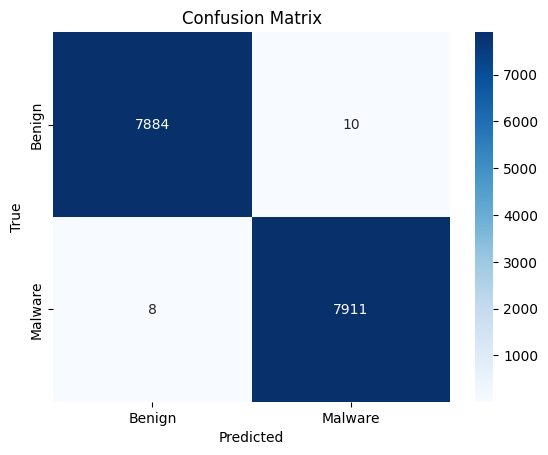

In [23]:
loss, acc , precision= model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


  1/495 ━━━━━━━━━━━━━━━━━━━━ 1:21 165ms/step - accuracy: 1.0000 - loss: 7.7827e-04 - recall: 1.0000

 67/495 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - accuracy: 0.9987 - loss: 0.0026 - recall: 1.0000      

247/495 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.9985 - loss: 0.0033 - recall: 0.9991

434/495 ━━━━━━━━━━━━━━━━━━━━ 0s 347us/step - accuracy: 0.9987 - loss: 0.0032 - recall: 0.9991

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - accuracy: 0.9987 - loss: 0.0031 - recall: 0.9992


Test Loss: 0.0025
Test Accuracy: 0.9991
Test precision: 0.9992


  1/495 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step

266/495 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step

495/495 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7894
         1.0       1.00      1.00      1.00      7919

    accuracy                           1.00     15813
   macro avg       1.00      1.00      1.00     15813
weighted avg       1.00      1.00      1.00     15813



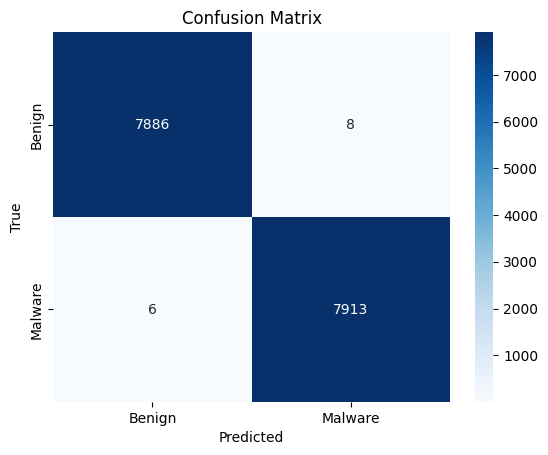

In [24]:
loss, acc , precision= lstm_bc.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {acc:.4f}")
print(f"Test precision: {precision:.4f}")

# Classification Report
y_pred = (lstm_bc.predict(X_test_lstm) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malware"], yticklabels=["Benign", "Malware"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [25]:
# Save full model (preferred modern way)
model.save("global_FNN_model.keras")
lstm_bc.save("global_lstm_model.keras")